In [29]:
from pathlib import Path

import pandas as pd
import seaborn as sb

from utils import load_df

In [30]:
DF = load_df("main-stopless-data")

In [31]:
def get_df(df):
    """ """
    if isinstance(df, str) or isinstance(df, Path):
        return load_df(df)
    return df  

In [39]:
def text_len_df(df):
    """ """
    df = get_df(df)
    lengths = {}
    for text, sent in zip(df.text, df.sentiment):
        l = len(text)
        if not l in lengths:
            lengths[l] = [0,0]
        lengths[l][sent] += 1
            
    return pd.DataFrame({
        "length": lengths.keys(),
        "count_neg": [v[0] for v in lengths.values()],
        "count_pos": [v[1] for v in lengths.values()],
    })

print("Lengths of Positive and Negative Sentiment Sentances")
df = text_len_df(DF)
df = df.sort_values("length")
df.head(10)

Lengths of Positive and Negative Sentiment Sentances


,length,count_neg,count_pos
148,1,1,0
124,2,29,22
123,3,42,65
134,4,58,79
88,5,1453,1170
92,6,662,624
75,7,1365,1063
114,8,1657,1626
113,9,1981,2056
6,10,2656,2828


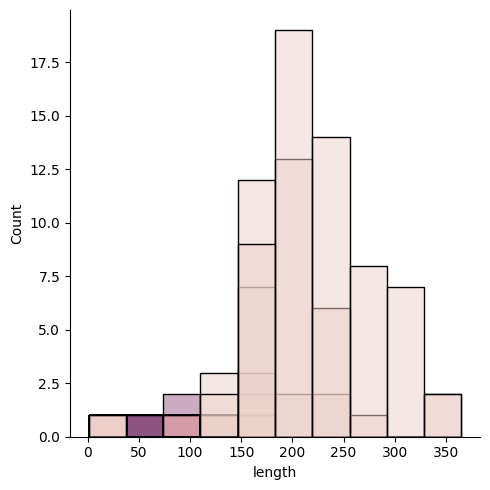

In [44]:
sb.displot(df, x="length", hue="count_neg", legend=False)

In [4]:
def word_count_df(df):
    """ """
    df = get_df(df)
    counts = {}
    for text, sent in zip(df.text, df.sentiment):
        for word in text.split():
            if not word in counts:
                counts[word] = [0,0]
            counts[word][sent] += 1
    return pd.DataFrame({
        "word": counts.keys(),
        "count_neg": [v[0] for v in counts.values()],
        "count_pos": [v[1] for v in counts.values()],
    }) 

df = word_count_df(DF)

print("Most Common Words in Positive Sentiment Sentances")
df = df.sort_values("count_pos", ascending=False)
df.head(30)

Most Common Words in Positive Sentiment Sentances


,word,count_neg,count_pos
0,USER,306592,449596
198,good,29297,62082
1,URL,25681,52219
83,but,84559,48077
108,love,16783,46902
9,day,40834,46684
546,quot,25279,44377
36,like,40866,37365
53,lol,23001,35787
55,thanks,5790,34410


In [5]:
print("Most Common Words in Negative Sentiment Sentances")
df = df.sort_values("count_neg", ascending=False)
df.head(30)

Most Common Words in Negative Sentiment Sentances


,word,count_neg,count_pos
0,USER,306592,449596
83,but,84559,48077
39,not,74559,33302
38,no,53876,22082
30,go,45203,27970
205,dont,44824,22111
175,work,44000,19099
12,cant,43756,19240
36,like,40866,37365
9,day,40834,46684
